In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from hep_ml.reweight import GBReweighter

/afs/cern.ch/user/d/dmuller/work/anaconda3/envs/k3pi_python3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
# Create an original and target distribution, roughly looking like true and reconstructed lifetime
original = np.random.exponential(5, size=1000000)
target = np.random.exponential(5, size=3000000)
target = target[target>4]
target += np.random.normal(scale=1.5, size=len(target))
target = target[target>0][:1000000]

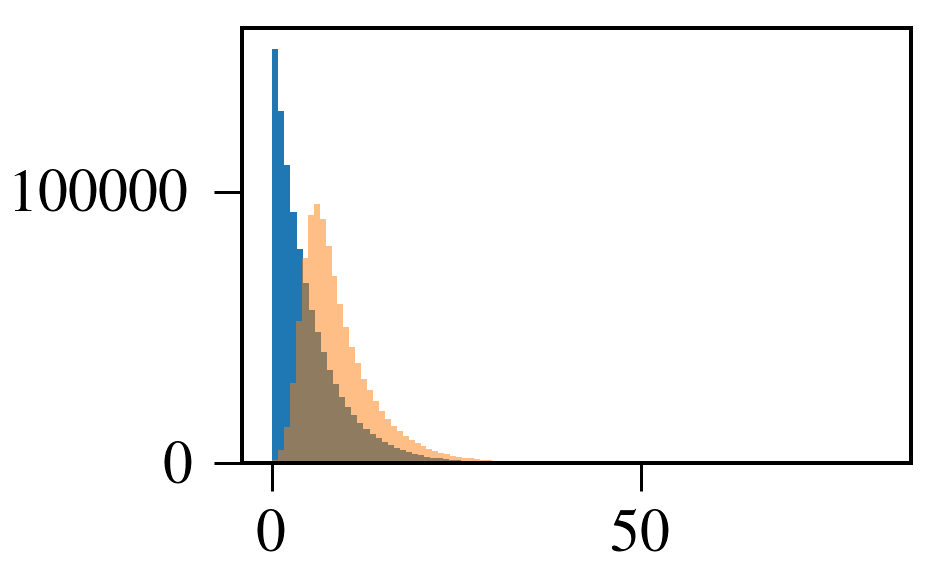

In [35]:
plt.hist(original, bins=100);
plt.hist(target, bins=100, alpha=0.5);

In [27]:
reweighter = GBReweighter()
reweighter.fit(target=target, original=original)

GBReweighter(gb_args={}, learning_rate=0.2, max_depth=3, min_samples_leaf=200,
       n_estimators=40)

In [28]:
weights = reweighter.predict_weights(original)

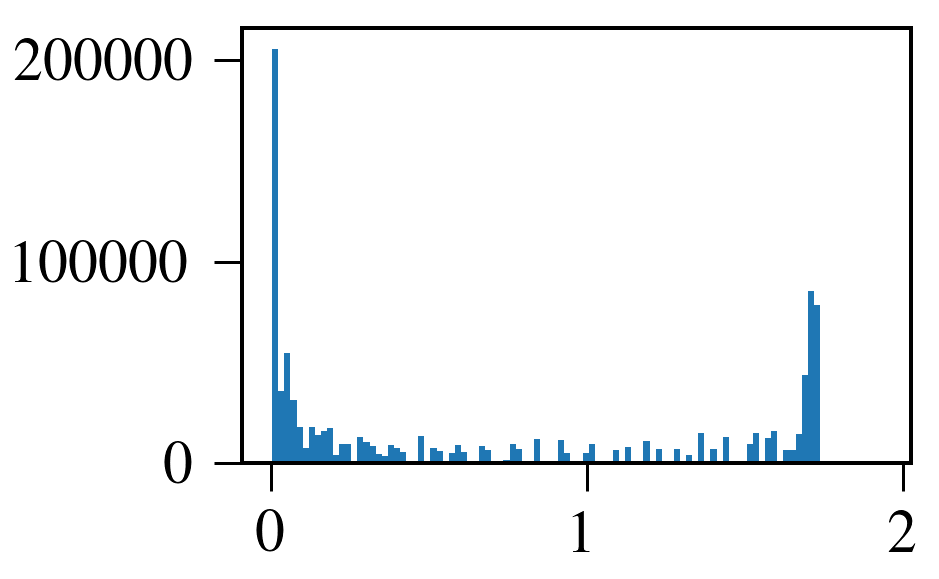

In [31]:
plt.hist(weights, bins=100);

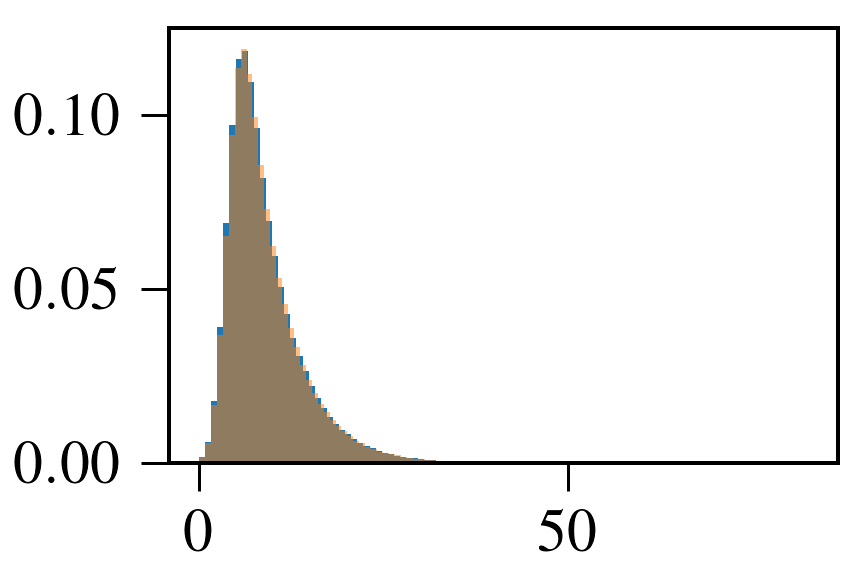

In [34]:
plt.hist(original, bins=100, normed=True, weights=weights);
plt.hist(target, bins=100, alpha=0.5, normed=True);